# Numeryczne rozwiązywanie równań różniczkowych cząstkowych
## Równanie eliptyczne

<br>


### Metoda Galerkina 2D
Użyjemy sympy, by nie musieć samodzielnie liczyć całek.

In [79]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pylab
x, y = sp.symbols('x y')

Funkcja zwracająca funkcje bazowe

In [80]:
def sines(x, y, Nx, Ny):
    return ???

Równanie Poissona:

$$ -\Delta u = f \;\;\; \text{w} \;\;\; \Omega $$
$$ u = 0 \;\;\; \text{na} \;\;\; \partial \Omega $$

Zbudujmy odpowiedni układ równań


$$\sum\limits_{j=1}^{n} c_j \iint_\Omega \nabla u_j \nabla u_i dxdy = \iint_\Omega f u_i dxdy \;\;\; i=1,...,n$$


$$ Ac = b $$

In [170]:
def construct_A_and_b(f, psi, Omega):
    N = len(psi) - 1
    A = sp.zeros(N + 1, N + 1)
    b = sp.zeros(N + 1, 1)
    for i in range(N + 1):
        for j in range(i, N + 1):
            integrand = ???
            I = sp.integrate(integrand,
                 (x, Omega[0][0], Omega[0][1]),
                 (y, Omega[1][0], Omega[1][1]))
            A[i, j] = A[j, i] = I
            
        integrand = - ???
        I = sp.integrate(integrand,
                 (x, Omega[0][0], Omega[0][1]),
                 (y, Omega[1][0], Omega[1][1]))
        b[i, 0] = I
    return A, b

### Zadanie 1

In [82]:
f = 0
psi = sines(x, y, 1, 1)
Omega = [[0, 1], [0, 1]]
A, b = construct_A_and_b(f, psi, Omega)
print(A, b)

Matrix([[pi**2/2, 0, 0, 0], [0, 5*pi**2/4, 0, 0], [0, 0, 5*pi**2/4, 0], [0, 0, 0, 2*pi**2]]) Matrix([[0], [0], [0], [0]])


Rozwiązanie symobliczne

In [83]:
c = A.LUsolve(b)
u = 0
for i in range(len(psi)):
    u += c[i, 0] * psi[i]
print(u)

0


Rozwiązanie numeryczne

In [84]:
A = np.array(A).astype(np.float64)
b = np.array(b).astype(np.float64)
c = np.linalg.solve(A, b)

Pomocnicze funkcje to wyrysowania wyników

In [150]:
def scatter_solution(c, psi, Omega, psi_0=0*x*y, d=16):
    X, Y, u = [], [], []
    for x_value in np.linspace(Omega[0][0], Omega[0][1], d):
        for y_value in np.linspace(Omega[1][0], Omega[1][1], d):
            X.append(x_value)
            Y.append(y_value)
            u.append(psi_0.subs([(x, x_value), (y, y_value)]))  # wyjaśnione poniżej
            for i in range(len(psi)):
                u[-1] += float(c[i] * psi[i].subs([(x, x_value), (y, y_value)]))
    return X, Y, u

def scatter_exac(func, Omega, d=16):
    X, Y, u = [], [], []
    for x_value in np.linspace(Omega[0][0], Omega[0][1], d):
        for y_value in np.linspace(Omega[1][0], Omega[1][1], d):
            X.append(x_value)
            Y.append(y_value)
            u.append(func.subs([(x, x_value), (y, y_value)]))
    return X, Y, u

In [151]:
def show(X, Y, u):
    pylab.axes().set_aspect('equal', 'box')
    plt.scatter(X, Y, marker='o', s=128, c=u, cmap="Greens")
    plt.colorbar()
    plt.show()

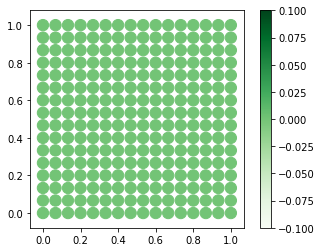

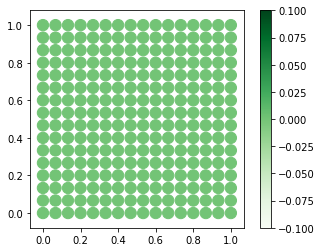

In [141]:
show(*scatter_solution(c, psi, Omega))
show(*scatter_exac(0*x*y, Omega))

### Zadanie 2

In [171]:
f = - 2 * sp.pi ** 2 * sp.sin(sp.pi * x) * sp.sin(sp.pi * y)
psi = sines(x, y, 1, 1)
Omega = [[0, 1], [0, 1]]
A, b = construct_A_and_b(f, psi, Omega)
# print(A, b)

In [172]:
A = np.array(A).astype(np.float64)
b = np.array(b).astype(np.float64)
c = np.linalg.solve(A, b)

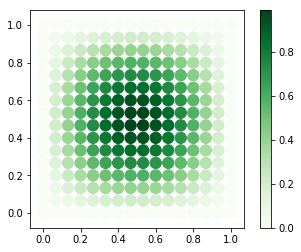

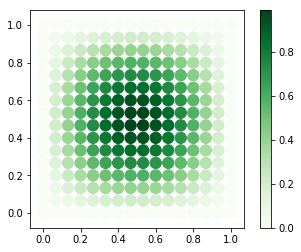

In [173]:
show(*scatter_solution(c, psi, Omega))
show(*scatter_exac(sp.sin(sp.pi * x) * sp.sin(sp.pi * y), Omega))

### Zadanie 3
Rozważmy zagadnienie z niezerowym brzegiem:
$$ -\Delta u = 0 $$
$$ \Omega = (0, a) \text{x} (0, a) $$

$$ u(0, y) = 0 $$
$$ u(a, y) = u_0(e^y - 1) $$
$$ u(x, 0) = 0 $$
$$ u(x, a) = u_0(e^x - 1) $$

Będziemy szukać funkcji postaci:

$$ u_{i}(x, y) = \psi_0 (x, y) + \sum\limits_{j=1}^{n} c_j \psi_j (x, y) $$

Proponuję:

$$ \psi_0 (x, y) = u_0 \frac{(e^x - 1)(e^y - 1)}{e^a - 1} $$

Rozwiąż dla $a = 3$

In [142]:
def construct_A_and_b_with_psi_0(f, psi, psi_0, Omega):
    ???
    return A, b

In [144]:
f = 0
psi = sines(x, y, 1, 1)
a = ???
Omega = [[0, a], [0, a]]
psi_0 = ???

A, b = construct_A_and_b_with_psi_0(f, psi, psi_0, Omega)

Rozwiązanie symboliczne jest dość skomplikowane

In [145]:
c = A.LUsolve(b)
u = psi_0
for i in range(len(psi)):
    u += c[i, 0] * psi[i]
print(u)

2*(-4*pi*exp(3)/(-pi**5 - 2*pi**3 - pi + pi*exp(3) + 2*pi**3*exp(3) + pi**5*exp(3)) - 2*pi**3/(-pi**5 - 2*pi**3 - pi + pi*exp(3) + 2*pi**3*exp(3) + pi**5*exp(3)) - 4*pi/(-pi**5 - 2*pi**3 - pi + pi*exp(3) + 2*pi**3*exp(3) + pi**5*exp(3)) + 2*pi**3*exp(6)/(-pi**5 - 2*pi**3 - pi + pi*exp(3) + 2*pi**3*exp(3) + pi**5*exp(3)))*sin(pi*x)*sin(pi*y)/(9*pi**2) + 4*(-8*pi**3*exp(6)/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)) - 8*pi/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)) + 8*pi*exp(3)/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)) + 8*pi**3*exp(3)/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)))*sin(pi*x)*sin(2*pi*y)/(45*pi**2) + 4*(-8*pi**3*exp(6)/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)) - 8*pi/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 10*pi**3*exp(3) + 8*pi**5*exp(3)) + 8*pi*exp(3)/(-8*pi**5 - 10*pi**3 - 2*pi + 2*pi*exp(3) + 

In [146]:
A = np.array(A).astype(np.float64)
b = np.array(b).astype(np.float64)
c = np.linalg.solve(A, b)

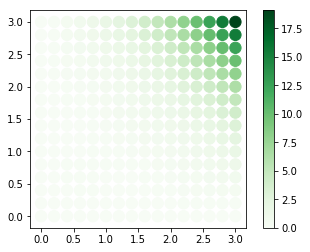

In [154]:
show(*scatter_solution(c, psi, Omega, psi_0))

### Zadanie 4
Srawdź błąd metody, co należy zmienić, aby się zmiejszył?

In [182]:
f = sp.sin(sp.pi * y) * (4 * sp.pi * x *sp.cos(sp.pi * x) - (sp.pi**2 * (x**2 + y**2) - 2) * sp.sin(sp.pi * x)) + \
    sp.sin(sp.pi * x) * (4 * sp.pi * y *sp.cos(sp.pi * y) - (sp.pi**2 * (x**2 + y**2) - 2) * sp.sin(sp.pi * y))
psi = sines(x, y, 1, 1)
Omega = [[0, 1], [0, 1]]
A, b = construct_A_and_b(f, psi, Omega)

In [183]:
A = np.array(A).astype(np.float64)
b = np.array(b).astype(np.float64)
c = np.linalg.solve(A, b)

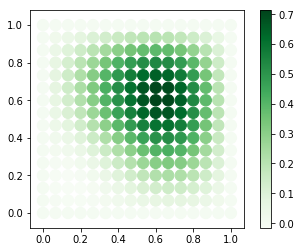

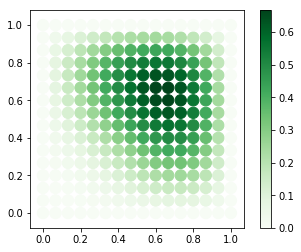

In [184]:
show(*scatter_solution(c, psi, Omega))
show(*scatter_exac(sp.sin(sp.pi * x) * sp.sin(sp.pi * y) * (x**2 + y**2), Omega))

In [ ]:
# Błąd
???

### Zadanie 5

In [185]:
f = 2 * (x**2 + y**2) - 2 * sp.pi ** 2 * sp.sin(sp.pi * x) * sp.sin(sp.pi * y)
psi = sines(x, y, 1, 1)
Omega = [[0, 1], [0, 1]]
psi_0 = x**2 * y**2

A, b = construct_A_and_b_with_psi_0(f, psi, psi_0, Omega)

In [186]:
A = np.array(A).astype(np.float64)
b = np.array(b).astype(np.float64)
c = np.linalg.solve(A, b)

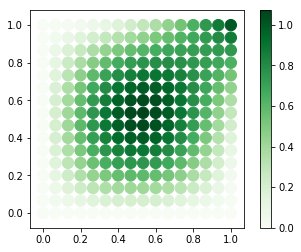

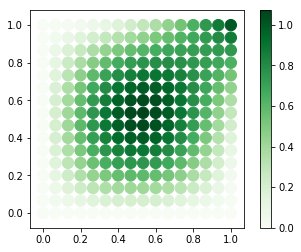

In [190]:
show(*scatter_solution(c, psi, Omega, psi_0))
show(*scatter_exac(x**2 * y**2 + sp.sin(sp.pi * x) * sp.sin(sp.pi * y), Omega))

### Metoda różnic skończonych
Zaimplementuj metodę różnic skończonych, rozwiąż powyższe zadania i porównaj wyniki

### Zadanie 6**: 
$ -\Delta u = -3 \pi^2 \sin(\pi x) \sin(\pi y) \sin(\pi z)$


$ u = 0 \;\;\; \text{na} \;\;\; \partial \Omega $


$ \Omega = (0, 1) \text{x} (0, 1) \text{x} (0, 1)$

Rozwiązadnie dokładne:
$\sin(\pi x) \sin(\pi y) \sin(\pi z)$